Week 9 Instructor-Led: Descriptive Statistics <br>

Author: Parker Munsey <br>
Course: BGEN632 Grad. Intro. to Python <br>
Term: Spring 2025 <br>
Date Due: April 28, 2025 <br> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import datetime


In [2]:
# 2. Load the datasets using local paths
hospitals = pd.read_csv(r"C:\Users\TechnellogicPC\UTW\Python\week9labs\CaliforniaHospitalData.csv")
personnel = pd.read_csv(r"C:\Users\TechnellogicPC\UTW\Python\week9labs\CaliforniaHospitalData_Personnel.txt", delimiter='\t')



In [3]:
# Drop the unnecessary columns
hospitals = hospitals.drop(columns=['Website'])
personnel = personnel.drop(columns=['Work_ID', 'PositionID', 'Phone', 'Email'])

# Merge datasets
merged = pd.merge(personnel, hospitals, on='HospitalID', how='left')

# Adding myself to dataset 
today = pd.to_datetime('today').normalize()

new_row = merged.iloc[0].copy()  # Copy the structure of an existing row

# Modifying my fields 
new_row['LastName'] = 'Munsey'
new_row['FirstName'] = 'Parker'
new_row['Gender'] = 'M'
new_row['PositionTitle'] = 'State Board Representative'
new_row['Compensation'] = 89473
new_row['MaxTerm'] = 3
new_row['StartDate'] = today

# Append the new row
merged = pd.concat([merged, pd.DataFrame([new_row])], ignore_index=True)

# Convert 'StartDate' to datetime
merged['StartDate'] = pd.to_datetime(merged['StartDate'])

# Convert text columns to 'category'
cat_columns = ['TypeControl', 'Teaching', 'DonorType', 'Gender']
merged[cat_columns] = merged[cat_columns].astype('category')

# Preview
merged.head()


,HospitalID,LastName,FirstName,Gender,PositionTitle,Compensation,MaxTerm,StartDate,Name,Zip,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,35665,Cherukuri,Dileep,M,Safety Inspection Member,23987,2,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12145,Rodriguez,Jose,M,Regional Representative,46978,4,2009-01-01,Victor Valley Community Hospital,92392,Non Profit,Small/Rural,Charity,345.0,136156.69130,3.344754e+07,2.034860e+07,53351748.0,-444391.0,99.0
2,45771,Rodriguez,Jose,M,Regional Representative,46978,4,2011-01-01,Eastern Plumas Hospital - Portola Campus,96122-9406,District,Small/Rural,Charity,219.0,52983.85792,8.074273e+06,1.299607e+07,19484351.0,-1585993.0,76.0
3,43353,Rodriguez,Jose,M,Safety Inspection Member,23987,2,2011-01-01,Catalina Island Medical Center,90704,Non Profit,Small/Rural,Charity,55.0,14172.24044,1.436471e+06,3.989894e+06,5235317.0,-191048.0,12.0
4,17718,Charles,Kenneth,M,Regional Representative,46978,4,2009-01-01,Mercy Medical Center - Mount Shasta,96067,Non Profit,Small/Rural,Charity,215.5,123480.27050,2.200350e+07,2.241005e+07,45769108.0,1355554.0,60.0


In [4]:
# Select only numeric columns
numeric_cols = merged.select_dtypes(include=[np.number])

# Create descriptive statistics
desc_stats = pd.DataFrame({
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max()
})

desc_stats


,Mean,Median,Min,Max
HospitalID,3.296212e+04,3.445400e+04,1.076700e+04,8.135100e+04
Compensation,8.954911e+04,4.697800e+04,2.398700e+04,2.489040e+05
MaxTerm,4.123077e+00,4.000000e+00,2.000000e+00,8.000000e+00
NoFTE,1.350264e+03,3.743200e+02,5.500000e+01,8.000000e+03
NetPatRev,6.695836e+05,1.723989e+05,1.417224e+04,4.662582e+06
InOperExp,1.662706e+08,3.184268e+07,1.436471e+06,1.285631e+09
OutOperExp,9.015808e+07,3.491622e+07,3.787718e+06,6.621559e+08
OperRev,2.562733e+08,6.339822e+07,5.235317e+06,1.912179e+09
OperInc,-1.553491e+05,1.572695e+06,-3.211633e+08,1.648724e+08
AvlBeds,1.945246e+02,9.900000e+01,1.200000e+01,9.090000e+02


In [5]:
# Text columns (object type)
text_cols = merged.select_dtypes(include='object')

text_summary = text_cols.describe()
text_summary


,LastName,FirstName,PositionTitle,Name,Zip
count,65,65,65,61,61
unique,27,23,4,61,61
top,Smith,David,Regional Representative,Victor Valley Community Hospital,92392
freq,4,6,24,1,1


In [6]:
cat_summary = merged[cat_columns].describe()
cat_summary


,TypeControl,Teaching,DonorType,Gender
count,61,61,61,65
unique,4,2,2,2
top,Non Profit,Small/Rural,Charity,F
freq,37,44,44,33


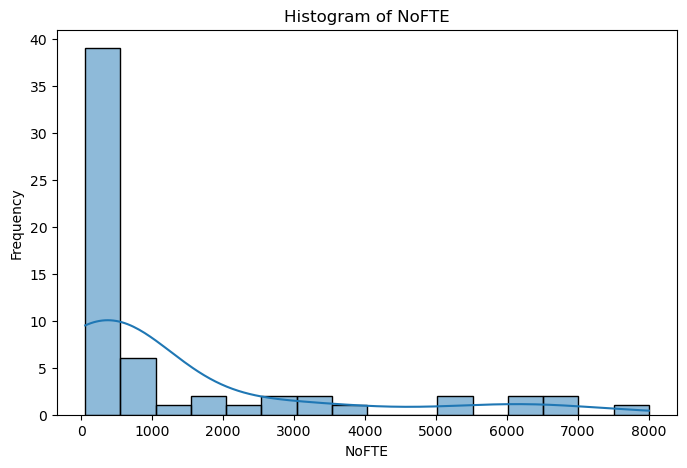

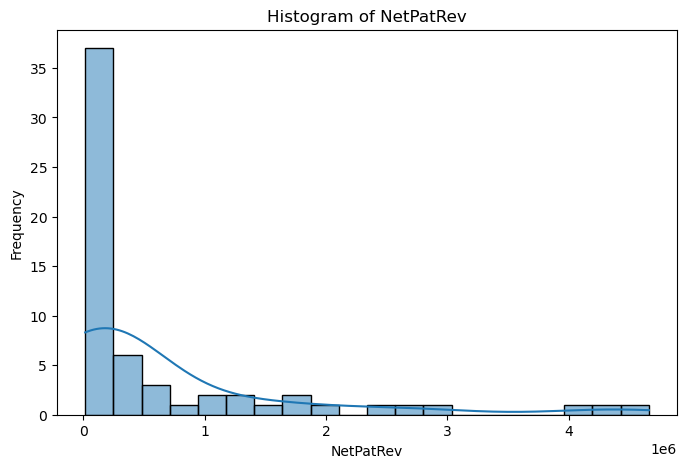

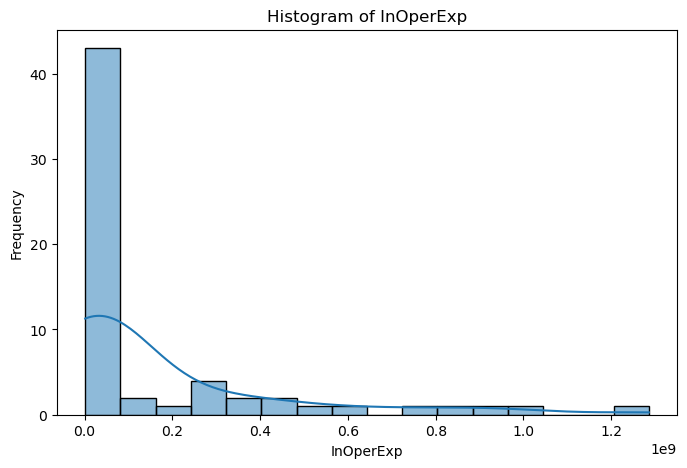

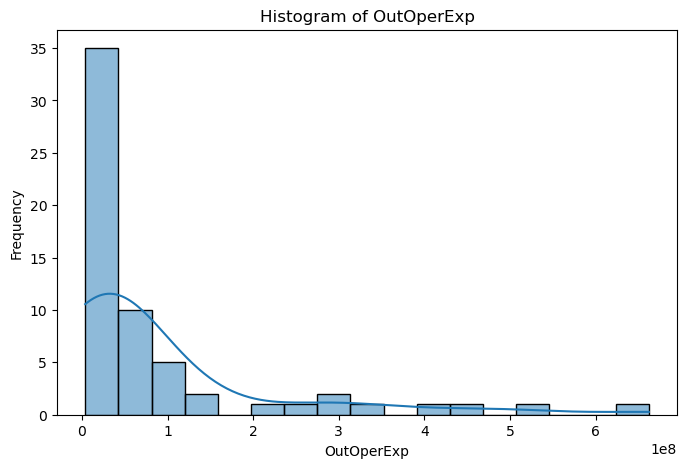

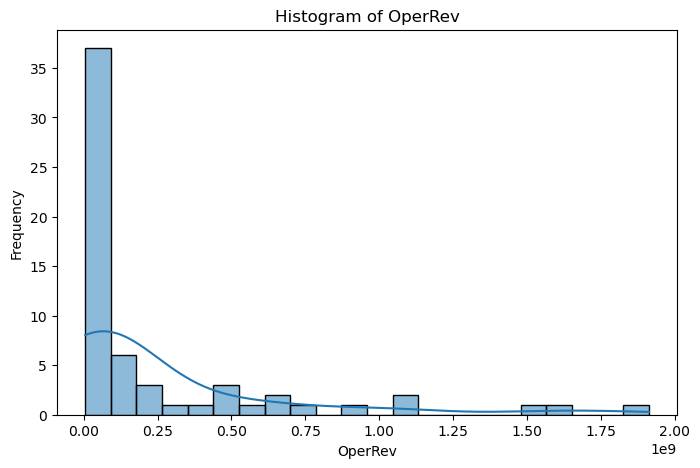

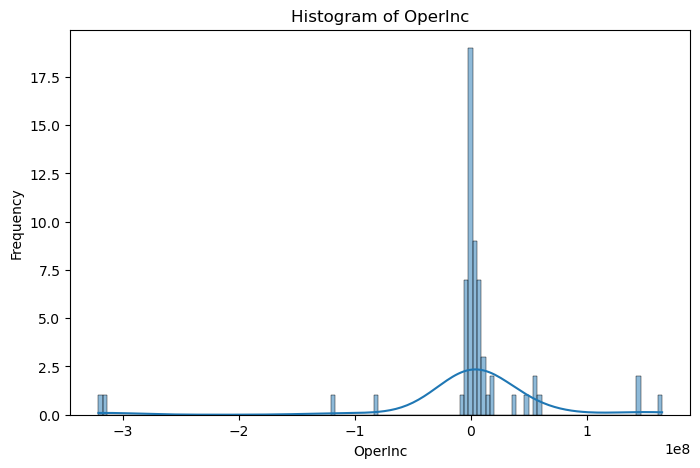

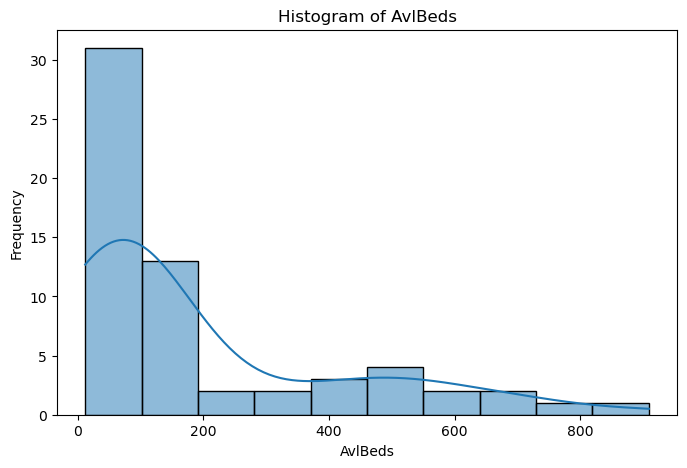

In [7]:
hist_vars = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

for var in hist_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=merged, x=var, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


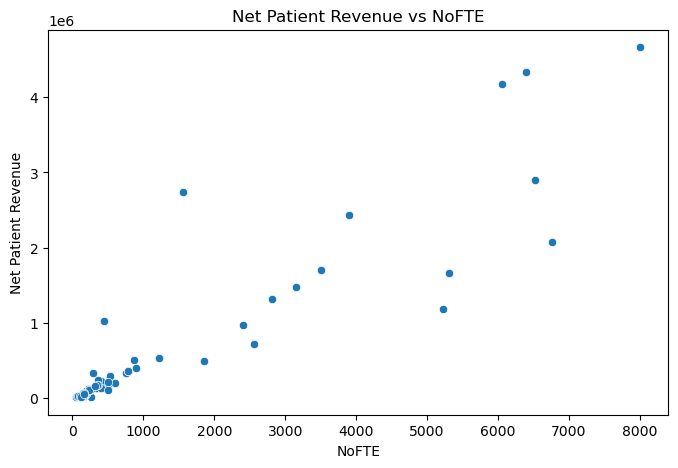

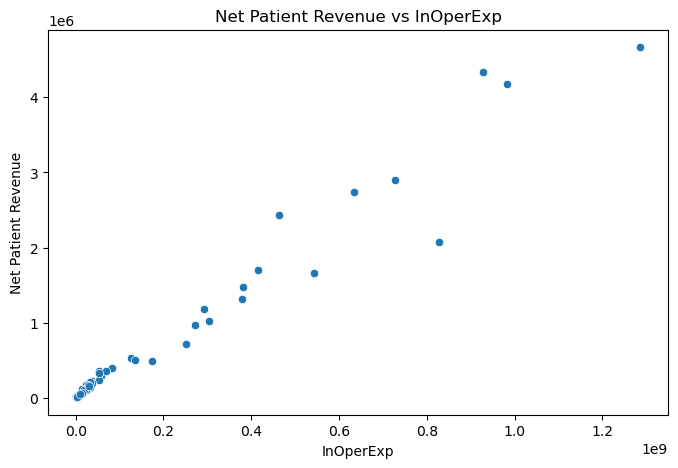

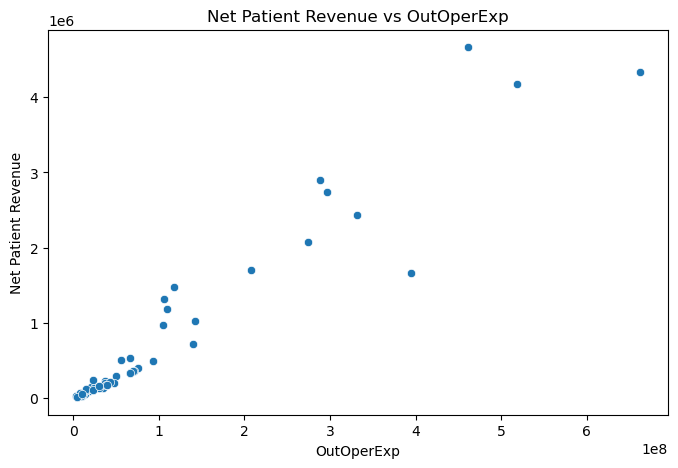

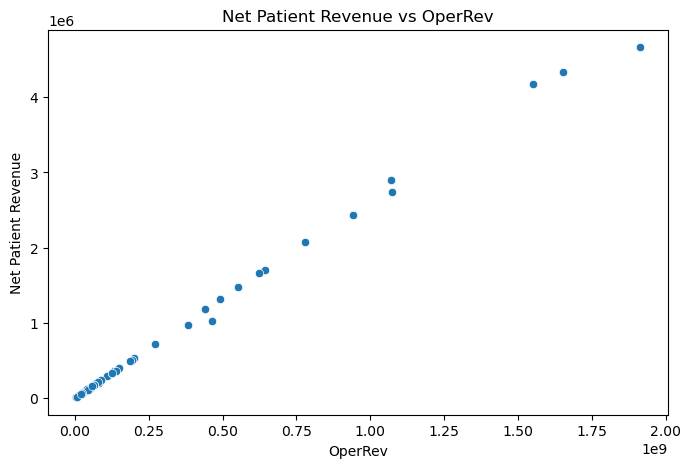

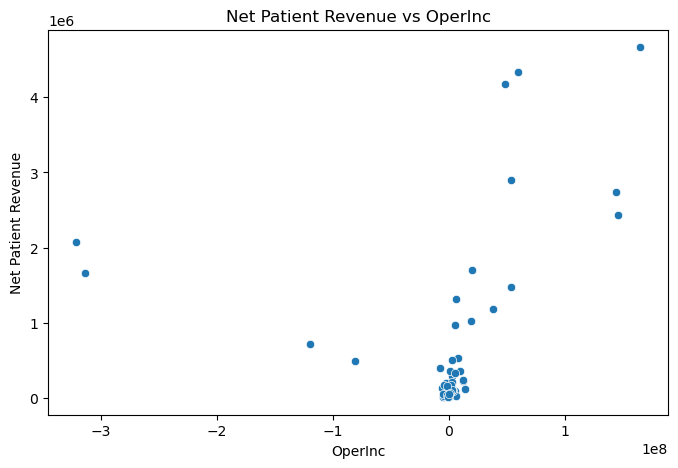

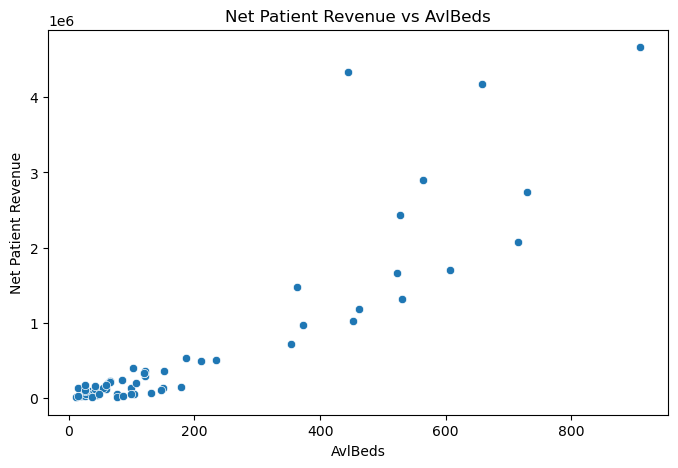

In [8]:
scatter_vars = ['NoFTE', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']

for var in scatter_vars:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=merged, x=var, y='NetPatRev')
    plt.title(f'Net Patient Revenue vs {var}')
    plt.xlabel(var)
    plt.ylabel('Net Patient Revenue')
    plt.show()


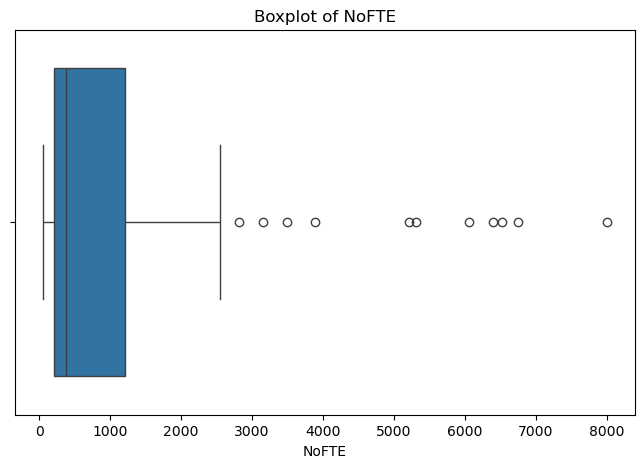

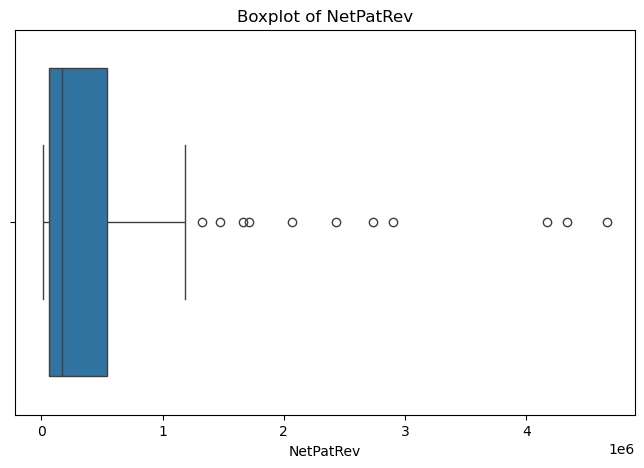

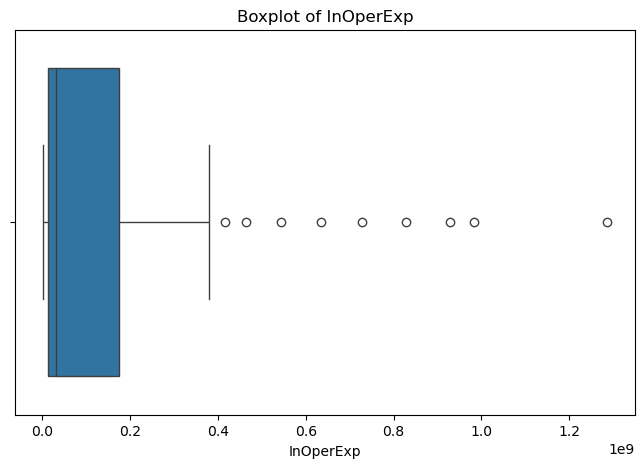

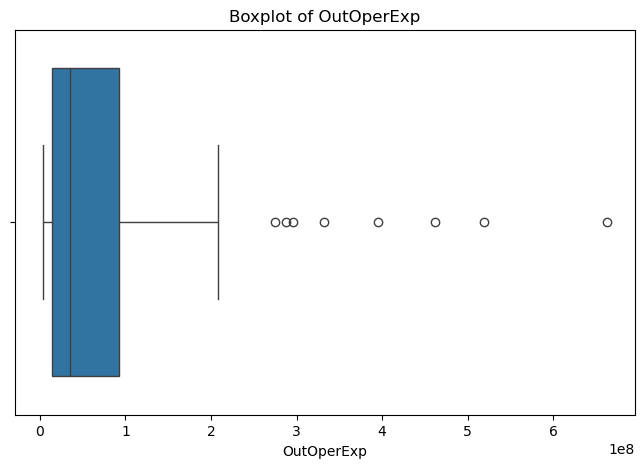

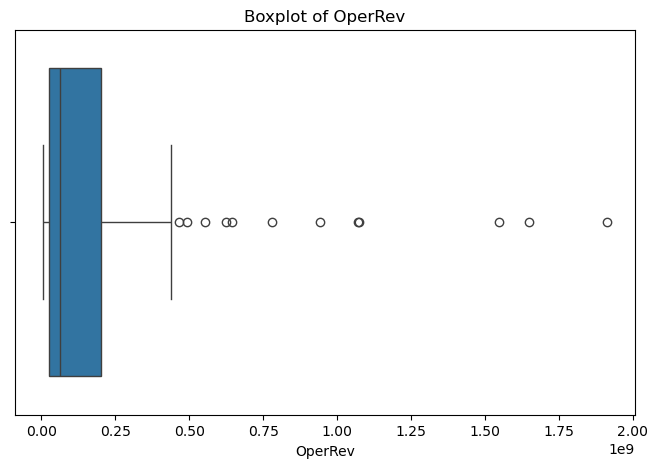

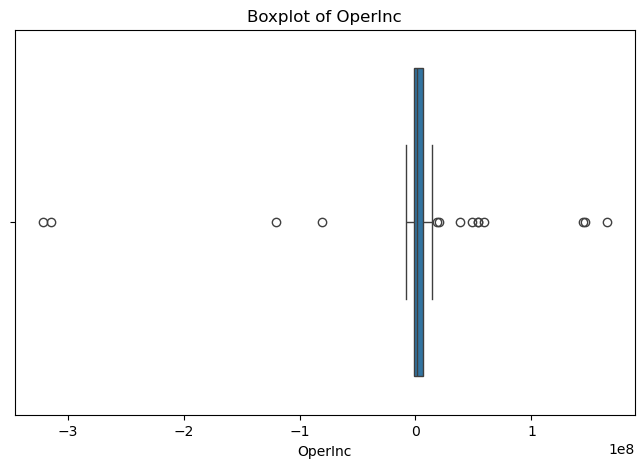

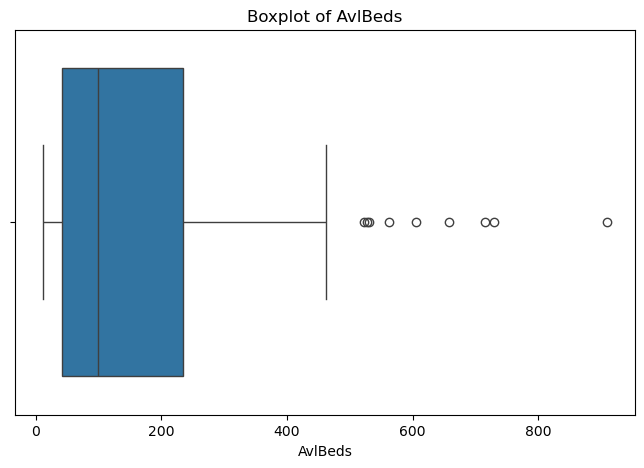

In [9]:
for var in hist_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=merged[var])
    plt.title(f'Boxplot of {var}')
    plt.show()


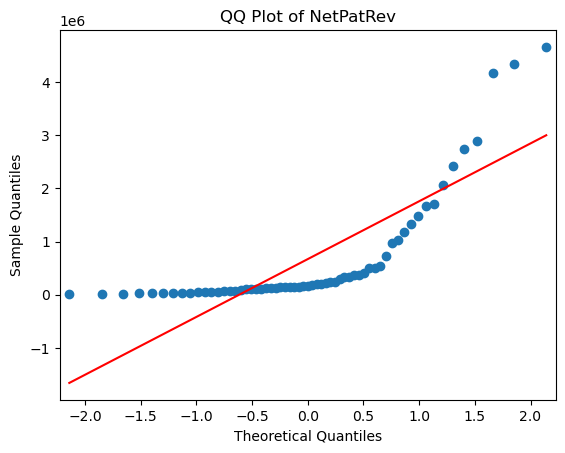

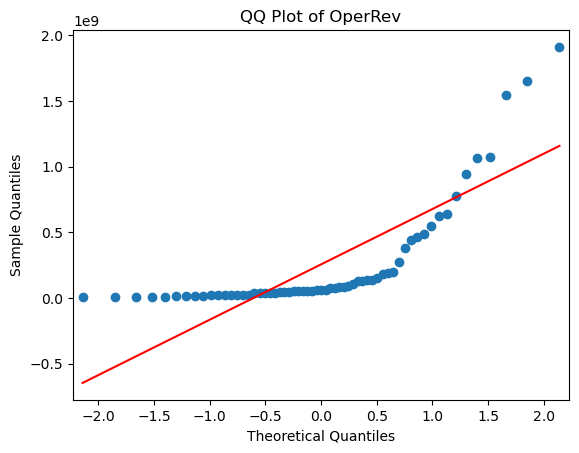

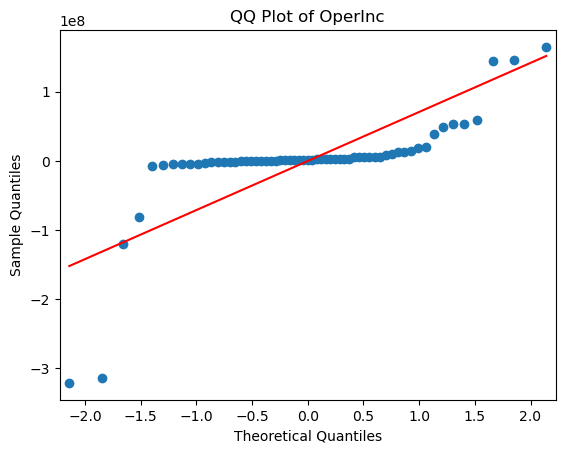

In [10]:
qq_vars = ['NetPatRev', 'OperRev', 'OperInc']  # you can choose others too

for var in qq_vars:
    sm.qqplot(merged[var].dropna(), line='s')
    plt.title(f'QQ Plot of {var}')
    plt.show()


In [11]:
for var in qq_vars:
    stat, p = stats.shapiro(merged[var].dropna())
    print(f'Shapiro-Wilk Test for {var}: stat={stat:.4f}, p-value={p:.4f}')


Shapiro-Wilk Test for NetPatRev: stat=0.6234, p-value=0.0000
Shapiro-Wilk Test for OperRev: stat=0.6212, p-value=0.0000
Shapiro-Wilk Test for OperInc: stat=0.5599, p-value=0.0000


References: <br>

Loading data (pd.read_csv()), Merging datasets, Dropping columns, Descriptive statistics (mean(), median(), etc.) <bt>
https://pandas.pydata.org/docs/ <br>

vHistograms, Scatterplots, Boxplots, QQ plots (via plt.plot(), plt.hist(), <br>
https://matplotlib.org/stable/users/index.html <br>

Residual plots, Histograms with KDE (sns.histplot()), Scatterplots (sns.scatterplot()), Boxplots (sns.boxplot()) <br>
https://seaborn.pydata.org/ <br>

Shapiro-Wilk Test (scipy.stats.shapiro()) <br>
